In [1]:
#Load packages

import mysql.connector
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

In [2]:
connection = mysql.connector.connect(host='localhost',
                                        database='uni_sports_platform',
                                        user='root',
                                        password='password',
                                        auth_plugin = 'mysql_native_password')

In [3]:
# Drop views if they exist
sql_select_Query = "Drop view if exists Player_Wins"
cursor = connection.cursor()
cursor.execute(sql_select_Query)

sql_select_Query = "Drop view if exists Tournament_Results"
cursor = connection.cursor()
cursor.execute(sql_select_Query)

In [4]:
# Create view 1

sql_select_Query = "create view Player_Wins as select players.P_HOGID, case when wins.total_games_won is not null then wins.total_games_won else 0 end as total_games_won from (select E.Plays_P_HOGID, count(*) as total_games_won from 	( select B.PG_Tourn_ID as tourn_id, B.PG_Game_No as game_number, (case when A.Score_team_home > A.Score_team_away then B.Team_ID_Home when A.Score_team_home < A.Score_team_away then B.Team_ID_Away end) as winner from game as A, play_game as B where B.PG_Tourn_ID = A.G_Tourn_ID and B.PG_Game_No = A.Game_No) as D, plays_for as E where D.winner = E.Plays_Team_ID group by E.Plays_P_HOGID) as wins right outer join players on players.P_HOGID = wins.Plays_P_HOGID"
cursor = connection.cursor()
cursor.execute(sql_select_Query)

In [5]:
# Create view 2

sql_select_Query = "create view Tournament_Results as select E.R_Tourn_ID as Tourn_ID, R_Team_ID as Team_ID, case when games_won is not null then games_won else 0 end as Games_Won from (select tourn_ID, count(*) as games_won, winner as Team_ID from 	(select B.PG_Tourn_ID as tourn_id, B.PG_Game_No as game_number, (case when A.Score_team_home > A.Score_team_away then B.Team_ID_Home when A.Score_team_home < A.Score_team_away then B.Team_ID_Away end) as winner from game as A, play_game as B where B.PG_Tourn_ID = A.G_Tourn_ID and B.PG_Game_No = A.Game_No) as C group by C.winner, C.tourn_ID) as D right outer join registration as E on D.Team_ID = E.R_Team_ID and D.tourn_ID = E.R_Tourn_ID"
cursor = connection.cursor()
cursor.execute(sql_select_Query)

In [6]:
# Query 1A

sql_select_Query = "select B.sport, round(sum(A.teams_in_sport)*avg(B.price)) as avg_tourn_rev from (select R_Tourn_ID, count(*) as teams_in_sport from registration group by R_Tourn_ID) as A, tournament as B where A.R_Tourn_ID = B.Tourn_ID group by B.sport order by avg_tourn_rev desc"
cursor = connection.cursor()
cursor.execute(sql_select_Query)
records = cursor.fetchall()
print("Sport vs Total revenue generated by their tournaments\n")
sport = []
revenue = []
for row in records:
    print("Sport: ",row[0],"\nGross revenue from tournament: ",row[1],"\n")
    sport.append(row[0])
    revenue.append(row[1])

Sport vs Total revenue generated by their tournaments

Sport:  Quidditch 
Gross revenue from tournament:  1680 

Sport:  Tennis 
Gross revenue from tournament:  480 

Sport:  Ping Pong 
Gross revenue from tournament:  280 

Sport:  Hockey 
Gross revenue from tournament:  200 

Sport:  Basketball 
Gross revenue from tournament:  160 

Sport:  Volleyball 
Gross revenue from tournament:  120 



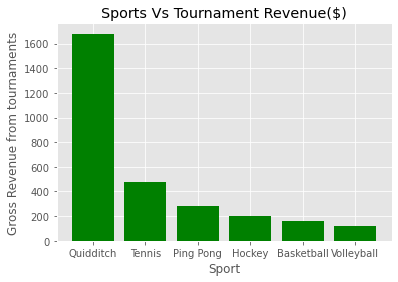

In [7]:
# Query 1A plot Bar graph

x_pos = [i for i, _ in enumerate(sport)]

plt.bar(x_pos, revenue, color='green')
plt.xlabel("Sport")
plt.ylabel("Gross Revenue from tournaments")
plt.title("Sports Vs Tournament Revenue($)")

plt.xticks(x_pos, sport)

plt.show()

In [8]:
# Query 1B

sql_select_Query = "select B.sport, round(sum(A.teams_in_sport)*avg(B.price)/count(*)) as avg_tourn_rev from (select R_Tourn_ID, count(*) as teams_in_sport from registration group by R_Tourn_ID) as A, tournament as B where A.R_Tourn_ID = B.Tourn_ID group by B.sport order by avg_tourn_rev desc"
cursor = connection.cursor()
cursor.execute(sql_select_Query)
records = cursor.fetchall()
print("Sport vs average revenue generated by their tournaments\n")
sport = []
revenue = []
for row in records:
    print("Sport: ",row[0],"\nGross revenue from tournament: ",row[1],"\n")
    sport.append(row[0])
    revenue.append(row[1])

Sport vs average revenue generated by their tournaments

Sport:  Quidditch 
Gross revenue from tournament:  560 

Sport:  Tennis 
Gross revenue from tournament:  240 

Sport:  Basketball 
Gross revenue from tournament:  160 

Sport:  Ping Pong 
Gross revenue from tournament:  140 

Sport:  Volleyball 
Gross revenue from tournament:  120 

Sport:  Hockey 
Gross revenue from tournament:  100 



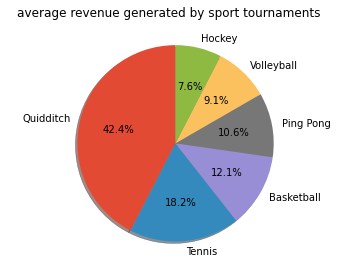

In [9]:
# Query 1B plot Pi graph

fig1, ax1 = plt.subplots()
ax1.pie(revenue, labels=sport, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.suptitle('average revenue generated by sport tournaments')

plt.show()

In [10]:
# Query 2

sql_select_Query = " select A.Name, B.total_games_won from users as A, Player_Wins as B where A.HOGID = B.P_HOGID order by total_games_won desc"
cursor = connection.cursor()
cursor.execute(sql_select_Query)
records = cursor.fetchall()
print("Top 9 people with most number of wins\n\n")
for row in records:
    print(row[0]," won ", row[1], " games.", "\n")

Top 9 people with most number of wins


Harry  won  14  games. 

Ron  won  9  games. 

Fred  won  8  games. 

George  won  8  games. 

Draco  won  8  games. 

Crabbe  won  8  games. 

Padma  won  7  games. 

Katie  won  7  games. 

Angelina  won  7  games. 

Ginny  won  6  games. 

Penelope  won  6  games. 

Percy  won  6  games. 

Godric  won  5  games. 

Pavarti  won  4  games. 

Cho  won  3  games. 

Salazar  won  3  games. 

Marcus  won  3  games. 

Goyle  won  3  games. 

Blaise  won  3  games. 

Pansy  won  3  games. 

Viktor  won  2  games. 

Susan  won  2  games. 

Hannah  won  2  games. 

Bill  won  1  games. 

Rowena  won  1  games. 

Michael  won  1  games. 

Lavender  won  1  games. 

Luna  won  1  games. 

Fleur  won  1  games. 

Neville  won  1  games. 

Hermione  won  1  games. 

Charlie  won  0  games. 

Cedric  won  0  games. 

Ernie  won  0  games. 

Dudley  won  0  games. 

Justin  won  0  games. 

Millicent  won  0  games. 

Seamus  won  0  games. 

Helga  won  0  g

In [11]:
# Query 3

sql_select_Query = "select A.Team_Name from team as A, Tournament_Results as B where A.Team_ID = B.Team_ID and B.Tourn_ID = 302 order by B.Games_Won desc limit 1 "
cursor = connection.cursor()
cursor.execute(sql_select_Query)
records = cursor.fetchall()
print("Tournament winner for tournament 302\n")
for row in records:
    print(row[0])
print("\n")

Tournament winner for tournament 302

GRYFFINDOR




In [12]:
# Query 4

sql_select_Query = "select A1.A_P_HOGID, u.Name, count(*) as shared_indoor_classes from attend as A1, users as u where A1.A_Class_ID in ( select A2.A_Class_ID from attend as A2, users as U2 where U2.HOGID = A2.A_P_HOGID and U2.Name = 'Hermione' ) and A1.A_Class_ID in ( select C1.Class_ID from class as C1 where C1.Location = 'Dungeons' or C1.Location = 'Great Hall') and u.HOGID = A1.A_P_HOGID and u.Name != 'Hermione' group by A1.A_P_HOGID order by shared_indoor_classes desc"

cursor = connection.cursor()
cursor.execute(sql_select_Query)
records = cursor.fetchall()
print("Number of common classes of students with Hermione\n\n")
plot_data = [0,0,0,0,0]
common_classes = []
name = []
for row in records:
    print("HOGID: ", row[0], "\nName: ", row[1], "\nNumber of classes in common:", row[2], "\n")
    plot_data[row[2]-1] = plot_data[row[2]-1] + 1
    if(row[2] > 1):
        name.append(row[1])
        common_classes.append(row[2])
print("\n")

Number of common classes of students with Hermione


HOGID:  18 
Name:  Pavarti 
Number of classes in common: 3 

HOGID:  1 
Name:  Katie 
Number of classes in common: 3 

HOGID:  17 
Name:  Seamus 
Number of classes in common: 2 

HOGID:  25 
Name:  Lavender 
Number of classes in common: 2 

HOGID:  16 
Name:  Angelina 
Number of classes in common: 2 

HOGID:  13 
Name:  Crabbe 
Number of classes in common: 1 

HOGID:  33 
Name:  Susan 
Number of classes in common: 1 

HOGID:  32 
Name:  Justin 
Number of classes in common: 1 

HOGID:  31 
Name:  Hannah 
Number of classes in common: 1 

HOGID:  30 
Name:  Ernie 
Number of classes in common: 1 

HOGID:  29 
Name:  Michael 
Number of classes in common: 1 

HOGID:  28 
Name:  Padma 
Number of classes in common: 1 

HOGID:  27 
Name:  Cedric 
Number of classes in common: 1 

HOGID:  23 
Name:  Ron 
Number of classes in common: 1 

HOGID:  22 
Name:  Draco 
Number of classes in common: 1 

HOGID:  14 
Name:  Viktor 
Number of classes in co

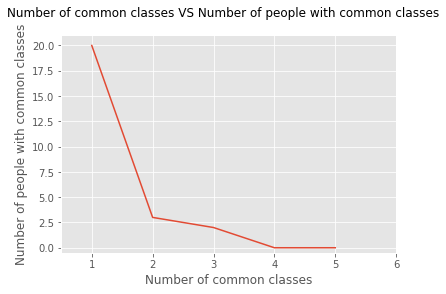

In [13]:
# Query 4 plot line graph

plt.plot([1, 2, 3, 4, 5], plot_data)
plt.axis([0.5, 6, -0.5, 21])
plt.xlabel('Number of common classes')
plt.ylabel('Number of people with common classes')
plt.suptitle('Number of common classes VS Number of people with common classes')
plt.show()

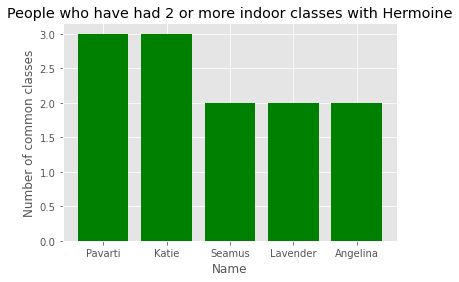

In [14]:
# Query 4 plot Bar graph

x_pos = [i for i, _ in enumerate(name)]

plt.bar(x_pos, common_classes, color='green')
plt.xlabel("Name")
plt.ylabel("Number of common classes")
plt.title("People who have had 2 or more indoor classes with Hermoine")

plt.xticks(x_pos, name)

plt.show()

In [15]:
#Query 5

sql_select_Query = "select U1.Name, sum(class_profit) as profit from (select C2.Class_ID, C2.Class_Cost*count(A1.A_P_HOGID) as class_profit, C2.I_HOGID from class as C2, attend as A1 where A1.A_Class_ID = C2.Class_ID group by A1.A_Class_ID) as C1, users as U1 where U1.HOGID = C1.I_HOGID group by U1.Name order by profit desc"
cursor = connection.cursor()
cursor.execute(sql_select_Query)
records = cursor.fetchall()
print("Intructor and the revenue from his classes\n")
instructor = []
revenue = []
for row in records:
    print("Instructor: ", row[0], "\nrevenue from his classes: ", row[1],"\n")
    instructor.append(row[0])
    revenue.append(row[1])

Intructor and the revenue from his classes

Instructor:  Flitwick 
revenue from his classes:  644 

Instructor:  Sprout 
revenue from his classes:  110 

Instructor:  McGonnagall 
revenue from his classes:  80 

Instructor:  Dumbledore 
revenue from his classes:  71 

Instructor:  Snape 
revenue from his classes:  40 



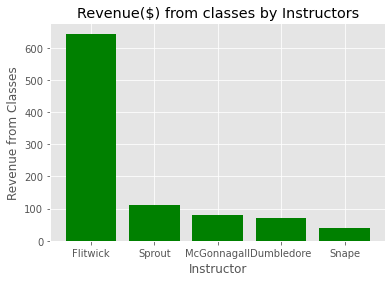

In [16]:
# Query 5 plot graph

x_pos = [i for i, _ in enumerate(instructor)]

plt.bar(x_pos, revenue, color='green')
plt.xlabel("Instructor")
plt.ylabel("Revenue from Classes")
plt.title("Revenue($) from classes by Instructors")

plt.xticks(x_pos, instructor)

plt.show()

In [17]:
# Drop all created views

sql_select_Query = "Drop view if exists Player_Wins"
cursor = connection.cursor()
cursor.execute(sql_select_Query)

sql_select_Query = "Drop view if exists Tournament_Results"
cursor = connection.cursor()
cursor.execute(sql_select_Query)

In [18]:
# Close Connection 
if (connection.is_connected()):
        cursor.close()
        connection.close()
        print("MySQL connection is closed")

MySQL connection is closed
